In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [2]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.shape

(144, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df.duplicated().sum()

0

Convert object column to datetime as time series cannot handle object datatype

In [7]:
df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df.set_index('Month',inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


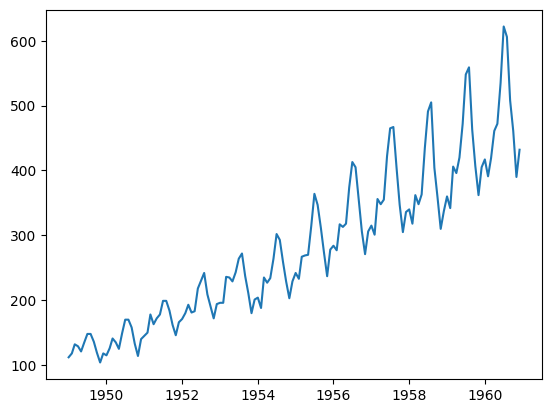

In [9]:
plt.plot(df)

There is upward trend and for each year the trend is increasing seasonally. There is dip in certain parts indicating noise

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)


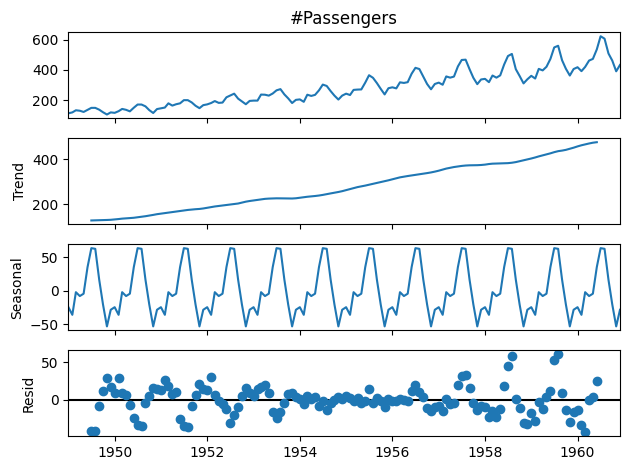

In [11]:
dec=seasonal_decompose(df['#Passengers'])
print(dec.plot())

Ad Fuller test to check if data is stationary or non-stationary

Perform hypothesis testing

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
result=adfuller(df)
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

First 2 values are

1.test value = 0.81

2.p-value = 0.99

If p-value is greater than 5% or 0.05(critical value) then it means that data is not stationary, we accept null hypothesis and reject the alternative hypothesis. If p value is less than 0.05 then null hypothesis is rejected


Null hypothesis is always that data is not stationary

In [14]:
print('p-value:',result[1])

p-value: 0.991880243437641


Now as data is non stationary, make the data stationary by rolling mean method

Conditions:

1.Constant mean

2.Constant variance

In [15]:
mean1=df.rolling(window=12).mean()
std1=df.rolling(window=12).std()

print(mean1.head())
print(std1.head())

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN


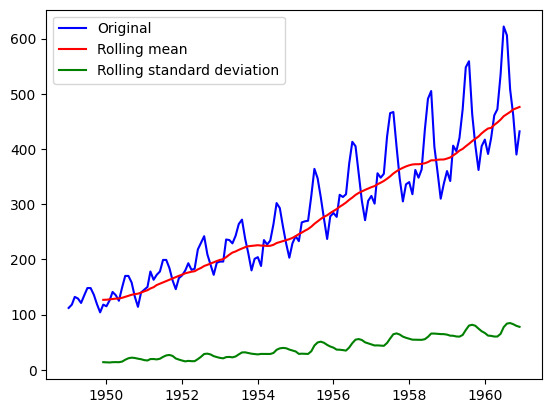

In [18]:
plt.plot(df,color='blue',label='Original')
plt.plot(mean1,color='red',label='Rolling mean')
plt.plot(std1,color='green',label='Rolling standard deviation')
plt.legend(loc='best')
plt.show()

Even in graph it is evident that mean and standard deviation have an upward trend i.e. non stationary. Need to perform transformation such that trend comes to static and makes the data stationary

Sort the data to compress range. Convert number of passengers to log

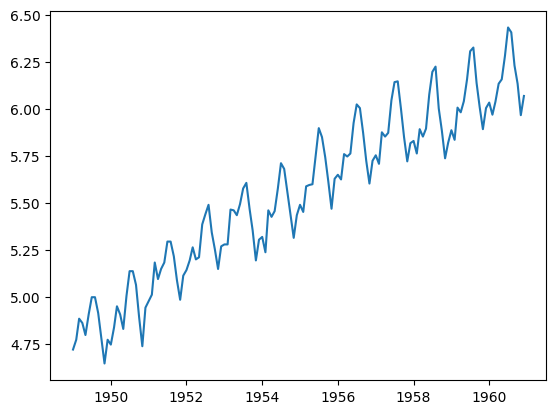

In [20]:
df_log=np.log(df)
plt.plot(df_log)

After performing transformations, it helps in making data stationary

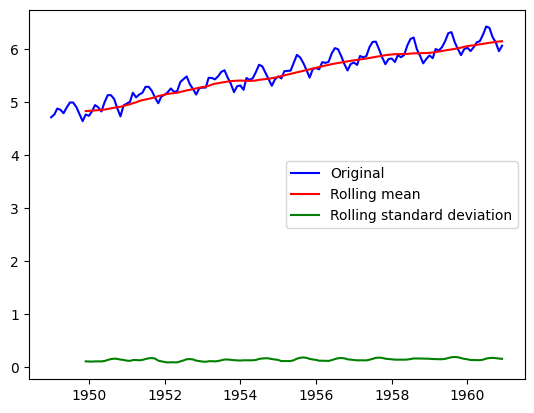

In [21]:
mean_log=df_log.rolling(window=12).mean()
std_log=df_log.rolling(window=12).std()

plt.plot(df_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='green',label='Rolling standard deviation')
plt.legend(loc='best')
plt.show()

Although transformed, yet data does not appear to be stationary from graph. Subtract mean log from original mean of data

In [27]:
df_new=df_log-mean_log
df_new.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


Remove the null values now as inter-record difference is not much significant

In [33]:
df_new.dropna(inplace=True)
df_new.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


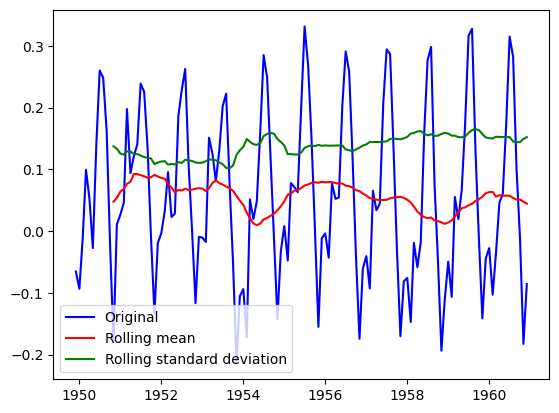

In [31]:
mean2=df_new.rolling(window=12).mean()
std2=df_new.rolling(window=12).std()

plt.plot(df_new,color='blue',label='Original')
plt.plot(mean2,color='red',label='Rolling mean')
plt.plot(std2,color='green',label='Rolling standard deviation')
plt.legend(loc='best')
plt.show()

Data now lies in same plane with static trend

In [34]:
new_result=adfuller(df_new)
p_value=new_result[1]
p_value

0.022234630001242206

As p value has now become less than 5% that means data is now stationary

Terms of time series model building

p-moving average

d-differencing, number of times transformations should be performed. This value should be as low as possible

q-autoregressive


ARIMA:

AR = autoregressive model > Q

MA = moving average model > P

Integration > D derived from number of transformation which is 1 here

AR + MA = ARIMA model for time series


ACF > Q can be found

PACF > P can be found

But it is not always accurate.

Instead use Auto ARIMA to get P and Q values

In [40]:
from statsmodels.tsa.arima.model import ARIMA

Splitting data to check if its giving actual value or not(right or wrong)

In [37]:
train=df_new.iloc[:120,:]
test=df_new.iloc[120:,:]
train,test

(            #Passengers
 Month                  
 1949-12-01    -0.065494
 1950-01-01    -0.093449
 1950-02-01    -0.007566
 1950-03-01     0.099416
 1950-04-01     0.052142
 ...                 ...
 1959-07-01     0.316430
 1959-08-01     0.327838
 1959-09-01     0.128057
 1959-10-01    -0.011315
 1959-11-01    -0.141406
 
 [120 rows x 1 columns],
             #Passengers
 Month                  
 1959-12-01    -0.044481
 1960-01-01    -0.027530
 1960-02-01    -0.103067
 1960-03-01    -0.036530
 1960-04-01     0.046332
 1960-05-01     0.060186
 1960-06-01     0.175033
 1960-07-01     0.315151
 1960-08-01     0.282363
 1960-09-01     0.098235
 1960-10-01    -0.009230
 1960-11-01    -0.182690
 1960-12-01    -0.085789)

In [41]:
model=ARIMA(train,order=(2,1,2))        #(P,D,Q)
x=model.fit()
df_new['Predict']=x.predict(start=len(train),end=len(train)+len(test)-1)
df_new.head(10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,#Passengers,Predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
1950-05-01,-0.027529,NaN
1950-06-01,0.139881,NaN
1950-07-01,0.260184,NaN
1950-08-01,0.248635,NaN


<Axes: xlabel='Month'>

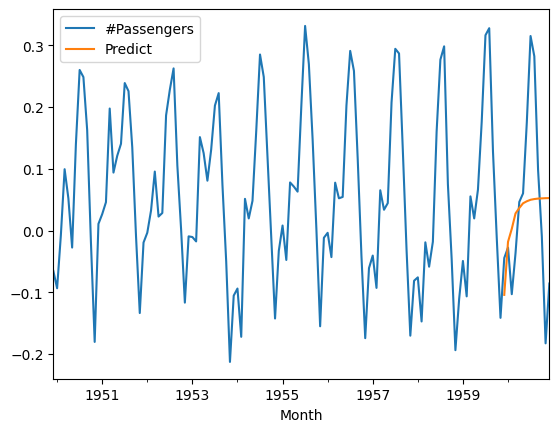

In [42]:
df_new[['#Passengers','Predict']].plot()

As random values of P and Q were taken predict is not optimum.

Use itertools to get optimum values of P and Q by auto ARIMA method

In [43]:
import itertools
p=range(8)
d=range(1,2)
q=range(8)

y=list(itertools.product(p,d,q))
y

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

Combination with least RMS should be selected as it will be most optimal

In [45]:
from sklearn.metrics import mean_squared_error
rmse=[]
order=[]

for i in y:
    model=ARIMA(train,order=i)
    model_fit=model.fit()
    pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
    error=np.sqrt(mean_squared_error(test,pred))
    order.append(i)
    rmse.append(error)

result_new=pd.DataFrame(index=order,data=rmse,columns=['RMSE'])
result_new

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

,RMSE
"(0, 1, 0)",0.228469
"(0, 1, 1)",0.252662
"(0, 1, 2)",0.140613
"(0, 1, 3)",0.140137
"(0, 1, 4)",0.136974
...,...
"(7, 1, 3)",0.082086
"(7, 1, 4)",0.139948
"(7, 1, 5)",0.056263
"(7, 1, 6)",0.060098


In [46]:
result_new.sort_values('RMSE')

,RMSE
"(7, 1, 7)",0.053966
"(7, 1, 5)",0.056263
"(7, 1, 6)",0.060098
"(6, 1, 6)",0.068580
"(6, 1, 7)",0.069077
...,...
"(2, 1, 0)",0.217928
"(0, 1, 0)",0.228469
"(1, 1, 1)",0.240001
"(0, 1, 1)",0.252662


From above dataframe it can be observed that 7,1,7 is the best combination and 7 is the optimal value for P and Q to get an accuracte prediction

In [47]:
model=ARIMA(train,order=(7,1,7))        #(P,D,Q)
x=model.fit()
df_new['Predict']=x.predict(start=len(train),end=len(train)+len(test)-1)
df_new.head(10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,#Passengers,Predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
1950-05-01,-0.027529,NaN
1950-06-01,0.139881,NaN
1950-07-01,0.260184,NaN
1950-08-01,0.248635,NaN


<Axes: xlabel='Month'>

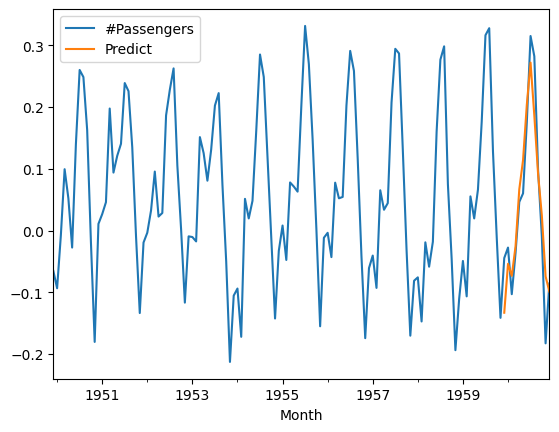

In [48]:
df_new[['#Passengers','Predict']].plot()

After modifying P and Q values generated from auto ARIMA (RMSE), accurate forecasting is generated